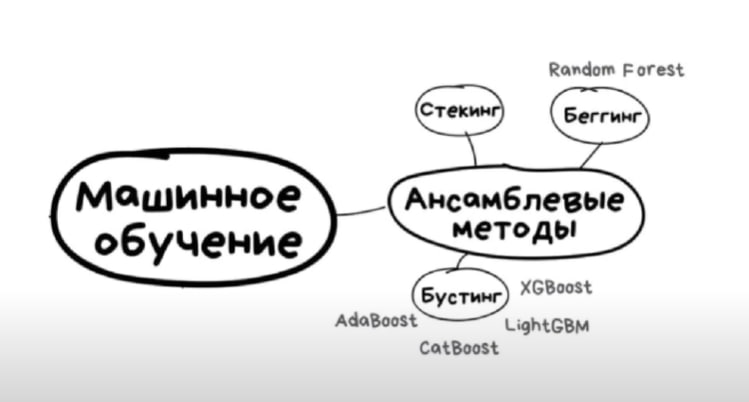


# Decision Trees

In [86]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

In [87]:
def get_metrics_scores(y_true, y_pred):
    return {
        'accuracy': accuracy_score(y_true, y_pred),
        'precision': precision_score(y_true, y_pred, average="micro"),
        'recall': recall_score(y_true, y_pred, average="micro"),
        'f1': accuracy_score(y_true, y_pred)
    }

In [88]:
# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

# Create a decision tree classifier and fit it to the training data
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = clf.predict(X_test)

# Print the accuracy of the classifier
get_metrics_scores(y_test, y_pred)

{'accuracy': 0.9, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}

In [89]:
X_train

array([[5.7, 3. , 4.2, 1.2],
       [5.6, 3. , 4.1, 1.3],
       [5.1, 3.5, 1.4, 0.2],
       [5.1, 3.8, 1.6, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.9, 2.5, 4.5, 1.7],
       [6. , 3.4, 4.5, 1.6],
       [4.9, 3. , 1.4, 0.2],
       [6.4, 3.2, 4.5, 1.5],
       [7.4, 2.8, 6.1, 1.9],
       [5.7, 2.8, 4.5, 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6.7, 3.1, 4.4, 1.4],
       [6.3, 3.3, 4.7, 1.6],
       [4.7, 3.2, 1.3, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [5. , 3.3, 1.4, 0.2],
       [5.7, 2.5, 5. , 2. ],
       [5.1, 3.8, 1.9, 0.4],
       [6.4, 2.8, 5.6, 2.2],
       [6.2, 3.4, 5.4, 2.3],
       [5.4, 3.4, 1.5, 0.4],
       [6.3, 3.3, 6. , 2.5],
       [6. , 2.2, 4. , 1. ],
       [5.6, 2.9, 3.6, 1.3],
       [5.6, 3. , 4.5, 1.5],
       [4.5, 2.3, 1.3, 0.3],
       [5.1, 3.4, 1.5, 0.2],
       [5.5, 2.4, 3.8, 1.1],
       [6.2, 2.9, 4.3, 1.3],
       [5.8, 2.6, 4. , 1.2],
       [5.6, 2.5, 3.9, 1.1],
       [6.7, 3.1, 4.7, 1.5],
       [6.5, 2

# XGBoost

In [90]:
import xgboost as xgb
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV

In [91]:
# Define the parameters for the XGBoost classifier
params = {
    'eta': [i / 10. for i in range(1, 11, 1)],
    'max_depth': range(3, 8, 1),
    'objective': ['multi:softprob'],
    'num_class': [3],
    'n_estimators': range(50, 100, 10)}

steps = 20  # The number of training iterations

# Create a decision tree classifier and fit it to the training data
grid_clf = GridSearchCV(xgb.XGBClassifier(), params, n_jobs=-1,
                        scoring='roc_auc',
                        verbose=2, refit=True)

grid_clf.fit(X_train, y_train)
best_params = grid_clf.best_params_

xgboost_clf = xgb.XGBClassifier(**best_params)
xgboost_clf.fit(X_train, np.reshape(y_train, (1, -1)))

# Predict the labels of the test set
xgboost_pred = xgboost_clf.predict(X_test)

# Print the accuracy of the classifier

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan

In [92]:
get_metrics_scores(y_test, xgboost_pred)

{'accuracy': 0.9, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}

In [93]:
best_params

{'eta': 0.1,
 'max_depth': 3,
 'n_estimators': 50,
 'num_class': 3,
 'objective': 'multi:softprob'}

# Random Forest

In [94]:
from sklearn.ensemble import RandomForestClassifier

rf_params = {'n_estimators': [200, 500],
             'criterion': ['gini', 'entropy'],
             'max_depth': [4, 5, 6, 7, 8, 9, 10],
             'max_features': ['auto', 'sqrt', 'log2']}

rf_grid = GridSearchCV(RandomForestClassifier(), rf_params, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, y_train)
print(rf_grid.best_params_)
print(rf_grid.best_estimator_)

Fitting 5 folds for each of 84 candidates, totalling 420 fits


D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
140 fits failed out of a total of 420.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
34 fits failed with the following error:
Traceback (most recent call last):
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "D:\python\DataProcessingLabs\venv\lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "D:\py

{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'n_estimators': 500}
RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=500)


In [95]:
rf_clf = RandomForestClassifier(**rf_grid.best_params_)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
get_metrics_scores(y_test, rf_pred)

{'accuracy': 0.9, 'precision': 0.9, 'recall': 0.9, 'f1': 0.9}

# Light GBM

In [96]:
import lightgbm as lgb

In [97]:
lgb_clf = lgb.LGBMClassifier()
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 86
[LightGBM] [Info] Number of data points in the train set: 120, number of used features: 4
[LightGBM] [Info] Start training from score -1.049822
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Info] Start training from score -1.123930
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

LGBMClassifier()

In [98]:
lgb_pred = lgb_clf.predict(X_test)
get_metrics_scores(y_test, lgb_pred)

{'accuracy': 0.9333333333333333,
 'precision': 0.9333333333333333,
 'recall': 0.9333333333333333,
 'f1': 0.9333333333333333}

# Metrics

In [99]:
import pandas as pd

In [104]:
from collections import defaultdict

models = [clf, rf_clf, xgboost_clf, lgb_clf]
metrics_scores_s = [get_metrics_scores(y_test, model.predict(X_test))
                    for model in models]
data = defaultdict(list)
for d in metrics_scores_s:
    for key,val in d.items():
        data[key].append(val)
        
metrics_df = pd.DataFrame(data, index=[repr(model) for model in models])
metrics_df

,accuracy,precision,recall,f1
"DecisionTreeClassifier(max_depth=2, random_state=42)",0.900000,0.900000,0.900000,0.900000
"RandomForestClassifier(max_depth=4, max_features='log2', n_estimators=500)",0.900000,0.900000,0.900000,0.900000
"XGBClassifier(base_score=None, booster=None, callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, device=None, early_stopping_rounds=None,\n enable_categorical=False, eta=0.1, eval_metric=None,\n feature_types=None, gamma=None, grow_policy=None,\n importance_type=None, interaction_constraints=None,\n learning_rate=None, max_bin=None, max_cat_threshold=None,\n max_cat_to_onehot=None, max_delta_step=None, max_depth=3,\n max_leaves=None, min_child_weight=None, missing=nan,\n monotone_constraints=None, multi_strategy=None, n_estimators=50,\n n_jobs=None, num_class=3, ...)",0.900000,0.900000,0.900000,0.900000
LGBMClassifier(),0.933333,0.933333,0.933333,0.933333
